# Backpropagation in Neural Networks

In this notebook, we extend our previous implementation of **linear regression using gradient descent** to build a **tiny fully connected neural network (NN)** from scratch using only NumPy.

The goal is to understand the **core mechanics** of how a neural network learns:

- how data flows **forward** through the layers  
- how errors flow **backward** using the chain rule  
- how weights and biases are **updated** using gradient descent  

This notebook intentionally avoids high-level libraries like TensorFlow or PyTorch so we can see every step clearly.


From Linear Regression to Neural Networks

In linear regression we optimized only two parameters:

- slope **m**  
- bias **b**

A neural network is different:  
it contains **multiple layers**, each with their own **weight matrices** and **bias vectors**, and uses **non-linear activation functions**.

However, the learning process is still driven by **gradient descent**, we simply need more gradients now.



<br>**Step 1**: Computing the Error
Training begins with random weights and biases.
We measure **how wrong** the predictions are using a loss function (such as mean squared error).  
Then we compute the **derivative of the loss** with respect to the network’s output.
This tells us:
> “If the prediction changed slightly, how would the loss change?”


<br>**Step 2** Backpropagation (Applying the Chain Rule)

Backpropagation systematically pushes the error backward through the network:

1. compute how much the final output contributed to the loss  
2. move this error backward through the output activation  
3. move the error backward into the hidden layer  
4. compute how much each **weight** and **bias** contributed  
5. accumulate the gradients needed for updates  

The result is a full set of gradients for every parameter:

- weights and biases of the hidden layer  
- weights and biases of the output layer  

These gradients tell the network how to change to reduce the loss. 
<br>**Step 3**: Updating Parameters (Gradient Descent)

Once gradients are computed, we perform the update step:

parameter > parameter - gradient

The learning rate **η** determines how big each step is.

You can visualize this as following the slope downhill on a landscape:

- the loss is your height  
- the gradient points downhill  
- the learning rate decides how far to move each step  

Each update makes the neural network slightly better at predicting.


In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loss function (mean squared error)
def mse_loss(m, b):
    return np.mean((Y - y_pred)**2 / len(X))


In [3]:
# acctivation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [16]:


# XOR gate data
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # 2 inputs
Y = np.array([[0], [1], [1], [0]])          # XOR output

# neural network archeticture
n_input, n_hidden, n_output = 2, 4, 1

# intializaing parameters 
learning_rate = 0.8
iterations = 1000

# Random weights and biases
np.random.seed(42)
W1 = np.random.randn(n_input, n_hidden)
B1 = np.random.randn(1, n_hidden)
W2 = np.random.randn(n_hidden, n_output)
B2 = np.random.randn(1, n_output)





In [17]:
def backprobagation(X, Y, hidden_output, y_pred, W2):
    """
    Computes gradients for W1, B1, W2, B2.
    """
   
    #output layer
    # dLoss/dPrediction (MSE loss)
    d_y_pred = 2 * (y_pred - Y) / Y.size  
    # derivative through sigmoid at output
    d_output_input = d_y_pred * sigmoid_derivative(y_pred)  
    # gradients for output weights and bias
    dW2 = hidden_output.T.dot(d_output_input)
    dB2 = np.sum(d_output_input, axis=0, keepdims=True)

    # hidden layer
    # backprop into hidden layer
    d_hidden_output = d_output_input.dot(W2.T)
    # derivative through sigmoid at hidden layer
    d_hidden_input = d_hidden_output * sigmoid_derivative(hidden_output)
    # gradients for hidden weights and bias
    dW1 = X.T.dot(d_hidden_input)
    
    dB1 = np.sum(d_hidden_input, axis=0, keepdims=True)

    return dW1, dB1, dW2, dB2


In [18]:
losses = []

for i in range(iterations):

    
    # Forward pass
    hidden_input = X.dot(W1) + B1
    hidden_output = sigmoid(hidden_input)
    output_input = hidden_output.dot(W2) + B2
    y_pred = sigmoid(output_input)

    # compute loss
    loss = np.mean((y_pred - Y)**2)
    losses.append(loss)

    # backprobagation
    dW1, dB1, dW2, dB2 = backprobagation(X, Y, hidden_output, y_pred, W2)
  
   

    # update parameters
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2

    # print loss
    if i % 100 == 0:
        print(f"Iteration {i}, Loss = {loss:.4f}")


Iteration 0, Loss = 0.4723
Iteration 100, Loss = 0.2483
Iteration 200, Loss = 0.2474
Iteration 300, Loss = 0.2461
Iteration 400, Loss = 0.2444
Iteration 500, Loss = 0.2423
Iteration 600, Loss = 0.2397
Iteration 700, Loss = 0.2369
Iteration 800, Loss = 0.2336
Iteration 900, Loss = 0.2299


In [19]:
print("Final prediction after training:")
binary_output = (y_pred > 0.5).astype(int)
print("Binary predictions:")
print(binary_output)

Final prediction after training:
Binary predictions:
[[0]
 [1]
 [1]
 [1]]


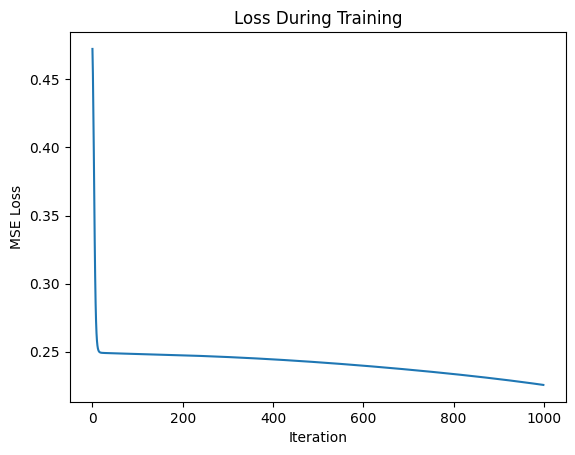

In [20]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss During Training")
plt.show()
